In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

# step 1: Business Problem Understanding
- detailed data analysis report on behalf of this data (HR Data)

# step 2: Data Loading

In [2]:
data=pd.read_csv('hr_data.csv')

In [3]:
data

,Name,Gender,Age,Rating,Date Joined,Department,Salary,Country
0,Parasuramudu Jamakayala,Male,20,Average,18-Oct-20,Website,"$112,650",IND
1,Yedukondalu Panditula,Male,32,Above average,7-Apr-21,Website,"$43,840",IND
2,Devsena Veluvalapalli,Female,31,Average,12-Apr-22,Procurement,"$103,550",IND
3,Gopal Venkata,Male,32,Average,23-May-21,HR,"$45,510",IND
4,Vasavi Veeravasarapu,Female,37,Poor,11-Sep-20,Finance,"$115,440",IND
...,...,...,...,...,...,...,...,...
178,Elia Cockton,Female,33,Average,26-Apr-21,Website,"$75,280",NZ
179,Gigi Bohling,Male,33,Average,8-Jul-21,Sales,"$74,550",NZ
180,Ebonee Roxburgh,Male,30,Average,20-May-22,Procurement,"$67,950",NZ
181,Shayne Stegel,Male,42,Poor,19-Jun-22,Finance,"$70,270",NZ


# step 3: Data Understanding or Exploration

- on Raw Data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         183 non-null    object
 1   Gender       183 non-null    object
 2   Age          183 non-null    int64 
 3   Rating       183 non-null    object
 4   Date Joined  183 non-null    object
 5   Department   183 non-null    object
 6   Salary       183 non-null    object
 7   Country      183 non-null    object
dtypes: int64(1), object(7)
memory usage: 11.6+ KB


- **Here we can observe that no null records in any of the columns**
- **we can easily observed that the datatype of Date Joined column needs to be changed as Date**

In [5]:
# first we need to understand each columns
data['Name'].nunique()

183

- means name column is totally unique and it should be dropped for better analysis

In [6]:
data['Gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [7]:
data['Gender'].value_counts()

Male      92
Female    85
Other      6
Name: Gender, dtype: int64

- Here three types of gender M,F and Other

In [8]:
data['Age']

0      20
1      32
2      31
3      32
4      37
       ..
178    33
179    33
180    30
181    42
182    26
Name: Age, Length: 183, dtype: int64

- Here we observed that Age is in int data type between some particular range and its only continuous dtype

In [9]:
data['Rating'].unique()

array(['Average', 'Above average', 'Poor', 'Exceptional', 'Very poor'],
      dtype=object)

In [10]:
data['Rating'].value_counts()

Average          137
Above average     20
Poor              16
Very poor          6
Exceptional        4
Name: Rating, dtype: int64

- Here Rating column contain ordinal discrete_categorical (very poor < Poor < Average < Above Average < Exceptional)
- If you're performing **descriptive analysis** (e.g., calculating mode or frequency), *keeping data in its original categorical form is fine.*


- **Why to change ordinal categorical data?**
- **Numerical Modeling**: Many statistical models and machine learning algorithms work with numerical data. Ordinal categorical data carries an inherent order, so it can be converted into numbers while preserving that order.
- **Preserve Meaning**: Encoding ordinal data numerically ensures the algorithm understands the relationship between the categories (e.g., "Beginner < Intermediate < Expert").
- **Efficient Computation**: Numerical data makes computations faster and easier in data analysis.

In [11]:
data['Date Joined']

0      18-Oct-20
1       7-Apr-21
2      12-Apr-22
3      23-May-21
4      11-Sep-20
         ...    
178    26-Apr-21
179     8-Jul-21
180    20-May-22
181    19-Jun-22
182     3-Aug-21
Name: Date Joined, Length: 183, dtype: object

In [12]:
data['Date Joined'].nunique()

160

- Here only requirement is to change the date joined into datetime dtype
- it is only time series columns

In [13]:
data['Department'].nunique()

5

In [14]:
data['Department'].value_counts()

Procurement    55
Website        54
Finance        38
Sales          28
HR              8
Name: Department, dtype: int64

- it is one of the important categorical column we have

In [15]:
data['Salary']

0      $112,650 
1       $43,840 
2      $103,550 
3       $45,510 
4      $115,440 
         ...    
178     $75,280 
179     $74,550 
180     $67,950 
181     $70,270 
182     $53,540 
Name: Salary, Length: 183, dtype: object

- it should be int or float type data for better analysis

In [16]:
data['Country'].nunique()

2

In [17]:
data['Country'].value_counts()

IND    92
NZ     91
Name: Country, dtype: int64

- Here we have employees of only two countries IND and NZ

In [18]:
# to check duplicates
data.duplicated().sum()

0

# step 4: Data Cleaning

1. Drop Name Column because it has all unique values

In [19]:
data=data.drop(columns='Name')

In [20]:
data

,Gender,Age,Rating,Date Joined,Department,Salary,Country
0,Male,20,Average,18-Oct-20,Website,"$112,650",IND
1,Male,32,Above average,7-Apr-21,Website,"$43,840",IND
2,Female,31,Average,12-Apr-22,Procurement,"$103,550",IND
3,Male,32,Average,23-May-21,HR,"$45,510",IND
4,Female,37,Poor,11-Sep-20,Finance,"$115,440",IND
...,...,...,...,...,...,...,...
178,Female,33,Average,26-Apr-21,Website,"$75,280",NZ
179,Male,33,Average,8-Jul-21,Sales,"$74,550",NZ
180,Male,30,Average,20-May-22,Procurement,"$67,950",NZ
181,Male,42,Poor,19-Jun-22,Finance,"$70,270",NZ


In [21]:
data[data['Gender']=='Other']

,Gender,Age,Rating,Date Joined,Department,Salary,Country
51,Other,27,Above average,16-Jan-21,Website,"$90,700",IND
55,Other,30,Average,5-Dec-21,Finance,"$64,000",IND
95,Other,37,Poor,11-Nov-20,Finance,"$115,440",NZ
116,Other,30,Average,5-Feb-22,Finance,"$64,000",NZ
153,Other,32,Average,1-Aug-22,Website,"$91,310",NZ
156,Other,26,Above average,16-Mar-21,Website,"$90,700",NZ


In [22]:
data['Date Joined'] = pd.to_datetime(data['Date Joined'], format='%d-%b-%y')

In [23]:
data

,Gender,Age,Rating,Date Joined,Department,Salary,Country
0,Male,20,Average,2020-10-18,Website,"$112,650",IND
1,Male,32,Above average,2021-04-07,Website,"$43,840",IND
2,Female,31,Average,2022-04-12,Procurement,"$103,550",IND
3,Male,32,Average,2021-05-23,HR,"$45,510",IND
4,Female,37,Poor,2020-09-11,Finance,"$115,440",IND
...,...,...,...,...,...,...,...
178,Female,33,Average,2021-04-26,Website,"$75,280",NZ
179,Male,33,Average,2021-07-08,Sales,"$74,550",NZ
180,Male,30,Average,2022-05-20,Procurement,"$67,950",NZ
181,Male,42,Poor,2022-06-19,Finance,"$70,270",NZ


- Here we have convert Date Joined column into proper formatting

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Gender       183 non-null    object        
 1   Age          183 non-null    int64         
 2   Rating       183 non-null    object        
 3   Date Joined  183 non-null    datetime64[ns]
 4   Department   183 non-null    object        
 5   Salary       183 non-null    object        
 6   Country      183 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 10.1+ KB


- Now we have to convert Salary into numeric data for better analysis

In [25]:
data['Salary'] = data['Salary'].str.replace('$', '', regex=True)  # Remove dollar sign
data['Salary'] = data['Salary'].str.replace(',', '', regex=True)  # Remove commas
data['Salary'] = pd.to_numeric(data['Salary'])  # Convert to numeric

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Gender       183 non-null    object        
 1   Age          183 non-null    int64         
 2   Rating       183 non-null    object        
 3   Date Joined  183 non-null    datetime64[ns]
 4   Department   183 non-null    object        
 5   Salary       183 non-null    int64         
 6   Country      183 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 10.1+ KB


In [27]:
continuous=['Age','Salary']
discrete_categorical=['Gender','Rating','Department','Country']
time_series=['Date Joined']

- Till now **Data Cleaning** has been finished
- Now Data Analysis

**Descriptive Statistical Analysis**

In [28]:
data[continuous].describe()

,Age,Salary
count,183.000000,183.000000
mean,30.480874,77173.715847
std,6.173180,24842.585100
min,20.000000,33920.000000
25%,27.000000,56980.000000
50%,30.000000,75000.000000
75%,34.000000,99970.000000
max,50.000000,119110.000000


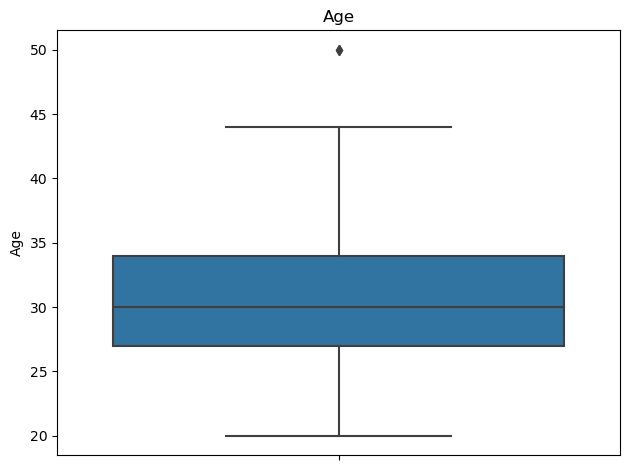

In [29]:
sns.boxplot(y=data['Age'])
plt.title("Age")
plt.tight_layout()
plt.show()

In [30]:
#drop outliers
Q1=27
Q3=34

IQR=Q3-Q1
print("IQR : ",IQR)

low_lim=Q1-(1.5*IQR)
up_lim= Q3+(1.5*IQR)

print("Upper Limit: ",up_lim)
print("Lower Limit: ",low_lim)

IQR :  7
Upper Limit:  44.5
Lower Limit:  16.5


In [31]:
outlier=data[(data['Age']<low_lim) | (data['Age']>up_lim)]
data=data.drop(outlier.index)
#outlier_drop()
data

,Gender,Age,Rating,Date Joined,Department,Salary,Country
0,Male,20,Average,2020-10-18,Website,112650,IND
1,Male,32,Above average,2021-04-07,Website,43840,IND
2,Female,31,Average,2022-04-12,Procurement,103550,IND
3,Male,32,Average,2021-05-23,HR,45510,IND
4,Female,37,Poor,2020-09-11,Finance,115440,IND
...,...,...,...,...,...,...,...
178,Female,33,Average,2021-04-26,Website,75280,NZ
179,Male,33,Average,2021-07-08,Sales,74550,NZ
180,Male,30,Average,2022-05-20,Procurement,67950,NZ
181,Male,42,Poor,2022-06-19,Finance,70270,NZ


In [99]:
data.to_csv("cleanedhrdata.csv",index=False)

In [33]:
data.shape

(181, 7)

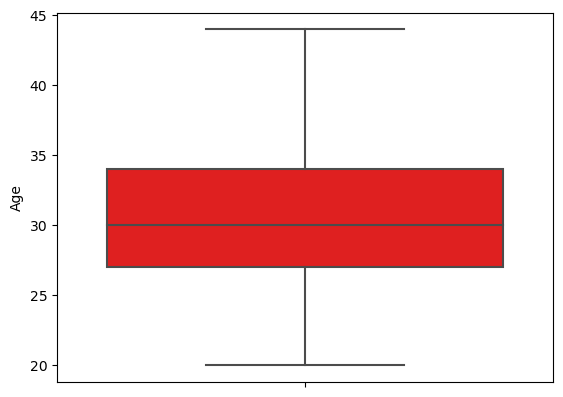

In [34]:
sns.boxplot(y=data['Age'],color='red')
plt.show()

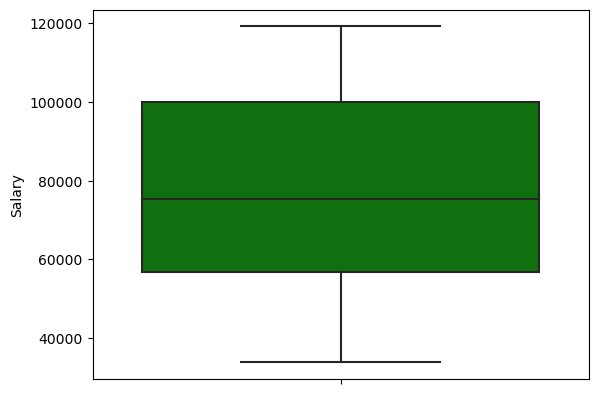

In [35]:
sns.boxplot(y=data['Salary'],color='green')
plt.show()

**No outliers in age  and Salary columns**

In [36]:
data[discrete_categorical].describe()

,Gender,Rating,Department,Country
count,181,181,181,181
unique,3,5,5,2
top,Male,Average,Website,IND
freq,90,135,54,91


In [37]:
data.isnull().sum()

Gender         0
Age            0
Rating         0
Date Joined    0
Department     0
Salary         0
Country        0
dtype: int64

**1. What is the distribution of employees by gender?**

In [38]:
data['Gender'].value_counts()

Male      90
Female    85
Other      6
Name: Gender, dtype: int64

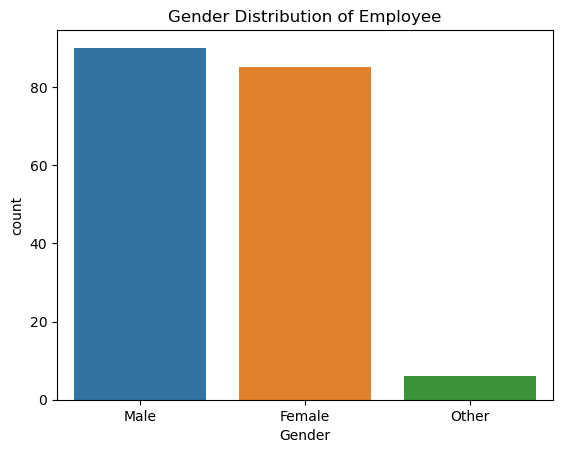

In [39]:
sns.countplot(x=data['Gender'])
plt.title("Gender Distribution of Employee")
plt.show()

**Observations**
- This plot shows the graphical representation of Gender wise employee
- 90 Males, 85 Females and 6 Others

**2. What percentage of employees are male, female and other?**

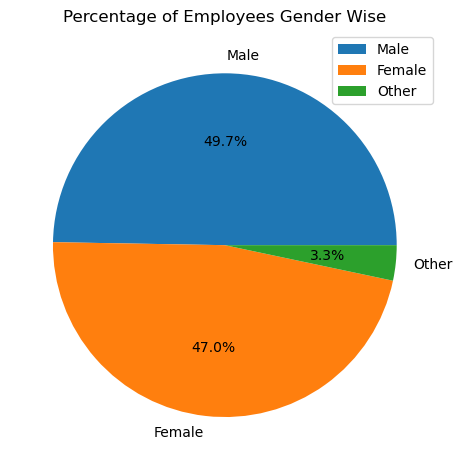

In [40]:
plt.pie(x=data['Gender'].value_counts(),
       labels=data['Gender'].value_counts().index.tolist(),
       autopct="%0.1f%%")
plt.legend()
plt.title("Percentage of Employees Gender Wise")
plt.tight_layout()
plt.show()

**Observation**
- Total 49.7 % of Male employee
- 47 % of Female employee
- only 3.3 % other gender employee are there

**3. What percentage of employees belong to each country gender wise?**

In [41]:
data.groupby('Country')['Gender'].value_counts()

Country  Gender
IND      Male      47
         Female    42
         Other      2
NZ       Female    43
         Male      43
         Other      4
Name: Gender, dtype: int64

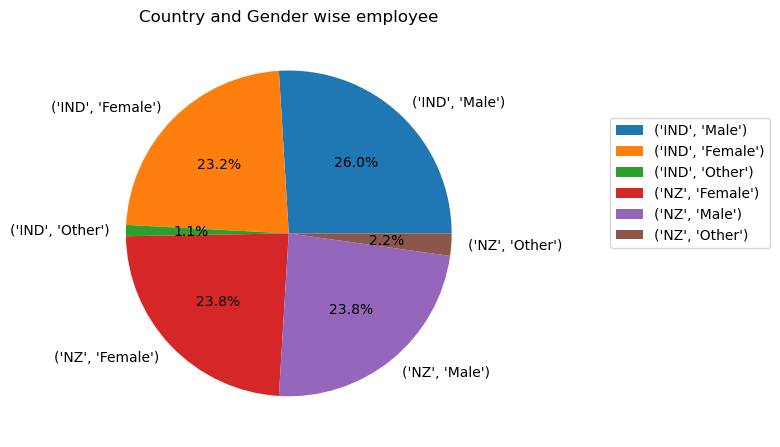

In [42]:
plt.pie(x=data.groupby('Country')['Gender'].value_counts(),
       labels=data.groupby('Country')['Gender'].value_counts().index.tolist(),
       autopct='%0.1f%%')
plt.legend(loc='upper right',bbox_to_anchor=(1.7,0.8))
plt.title("Country and Gender wise employee")
plt.tight_layout()
plt.show()

**Observation**
- From Total Employee 26% Males, 23.2% Females and 1.1% others employee belongs to India
- From Total Employee 23.8% Males, 23.8% Females and 3.3% others employee belongs to NewZealand

**4. How many employees are there in each country?**

In [43]:
data['Country'].value_counts()

IND    91
NZ     90
Name: Country, dtype: int64

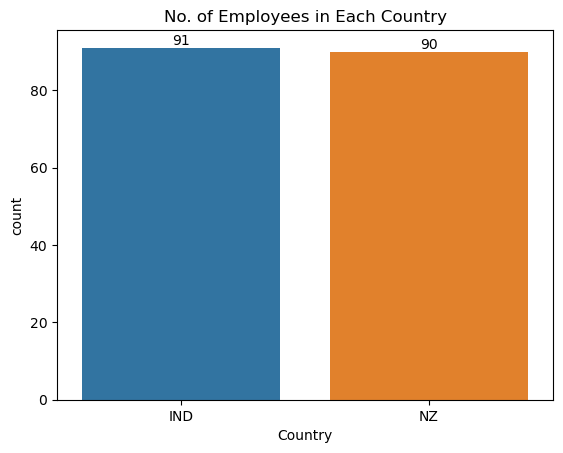

In [44]:
ax=sns.countplot(x=data['Country'])
# Add count annotations on the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), textcoords='offset points')
plt.title("No. of Employees in Each Country")
plt.show()

**Observation**
- 91 Employees out of 181 belongs to India
- 90 Employees belongs to New Zealand

**5. How many employees work in each department?**

In [45]:
data['Department'].value_counts()

Website        54
Procurement    53
Finance        38
Sales          28
HR              8
Name: Department, dtype: int64

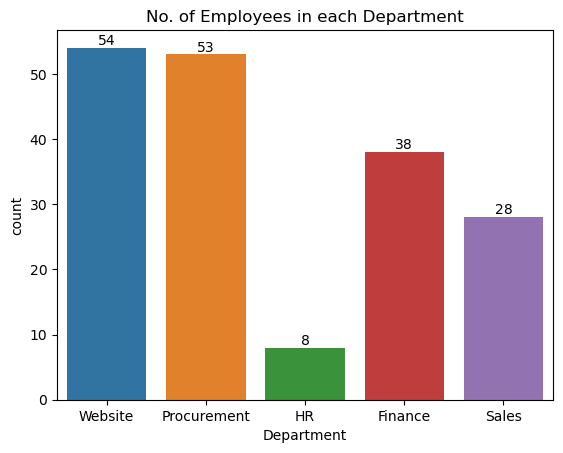

In [46]:
ax=sns.countplot(x=data['Department'])
# Add count annotations on the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), textcoords='offset points')
plt.title("No. of Employees in each Department")
plt.show()

**Observation**
- Website Department has **most** number of employees i.e. 54 followed by Procurement i.e. 53
- HR Department has **least** number of employees i.e. 8 only

**6. What is the gender distribution within each department?**

In [47]:
data.groupby('Department')['Gender'].value_counts()

Department   Gender
Finance      Female    19
             Male      16
             Other      3
HR           Female     5
             Male       3
Procurement  Male      30
             Female    23
Sales        Male      17
             Female    11
Website      Female    27
             Male      24
             Other      3
Name: Gender, dtype: int64

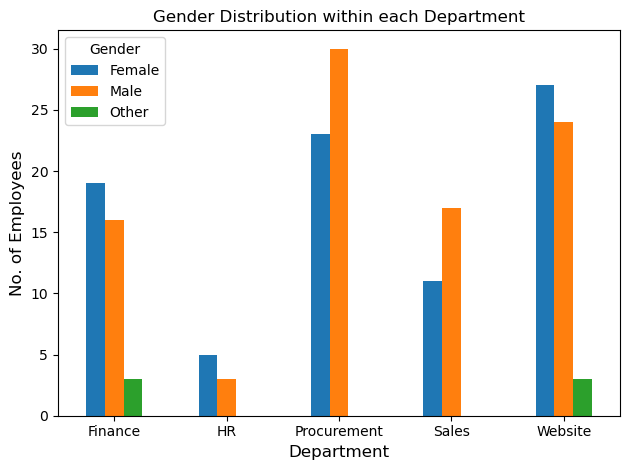

In [48]:
grouped_data = data.groupby('Department')['Gender'].value_counts().unstack()
grouped_data.plot(kind='bar', stacked=False)
plt.xlabel('Department',fontsize=12)
plt.ylabel('No. of Employees',fontsize=12)
plt.title("Gender Distribution within each Department")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Observation**
- In Finance there are 19 females, 16 males and 3 others gender employee
- In HR 5 Female and 3 Males are working
- In Procurement 30 males and 23 females are working
- In Sales 17 Males and 11 Females are working
- In Website department 27 females,24 males and 3 others are working 
- Most of the Females are working in Website Department and least in HR
- Most of the Males are working in Procurement

**7. What are the average, median, minimum, and maximum salaries in the dataset?**

In [49]:
data['Salary'].mean()

77246.24309392265

In [50]:
data['Salary'].median()

75280.0

In [51]:
data['Salary'].min()

33920

In [52]:
data['Salary'].max()

119110

- Hence 77246.24 is the **average** salary of the employee,
- 75280 is the **median** salary,
- 33920 is the **minimum** salary of an employee and 119110 is the **maximum** salary

**8. What is the salary distribution across different ranges (e.g., <$40K, $40K–$50K, etc.)?**

In [53]:
bins = [0, 40000, 60000, 80000, 100000, float('inf')]
labels = ['<$40K', '$40K–$60K', '$60K–$80K', '$80K–$100K', '$100K+']
data['Salary_Range'] = pd.cut(data['Salary'], bins=bins, labels=labels)

In [54]:
data

,Gender,Age,Rating,Date Joined,Department,Salary,Country,Salary_Range
0,Male,20,Average,2020-10-18,Website,112650,IND,$100K+
1,Male,32,Above average,2021-04-07,Website,43840,IND,$40K–$60K
2,Female,31,Average,2022-04-12,Procurement,103550,IND,$100K+
3,Male,32,Average,2021-05-23,HR,45510,IND,$40K–$60K
4,Female,37,Poor,2020-09-11,Finance,115440,IND,$100K+
...,...,...,...,...,...,...,...,...
178,Female,33,Average,2021-04-26,Website,75280,NZ,$60K–$80K
179,Male,33,Average,2021-07-08,Sales,74550,NZ,$60K–$80K
180,Male,30,Average,2022-05-20,Procurement,67950,NZ,$60K–$80K
181,Male,42,Poor,2022-06-19,Finance,70270,NZ,$60K–$80K


In [55]:
data['Salary_Range'].value_counts().sort_index()

<$40K          8
$40K–$60K     48
$60K–$80K     50
$80K–$100K    30
$100K+        45
Name: Salary_Range, dtype: int64

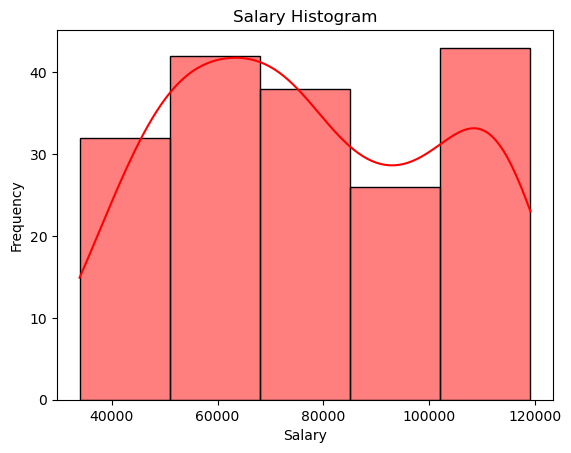

In [56]:
sns.histplot(x=data['Salary'],bins=5,kde=True,color='red',edgecolor='black')
plt.title('Salary Histogram')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

In [57]:
data['Salary'].skew()

0.12561080711310627

**Observation**
- Most number of employees have salary between 60000 to 80000 i.e. of 50 employees
- slightly right skewed data means more number of employees earning less than median salary which is 75000

**9. What is the average salary for each department?
Which department has the highest and lowest average salary?**

In [58]:
dep_avg_salary=data.groupby('Department')['Salary'].mean().reset_index(name='Avg_Salary').sort_values(by='Avg_Salary')
dep_avg_salary

,Department,Avg_Salary
3,Sales,67866.428571
0,Finance,72472.631579
4,Website,78753.703704
2,Procurement,82216.037736
1,HR,89650.000000


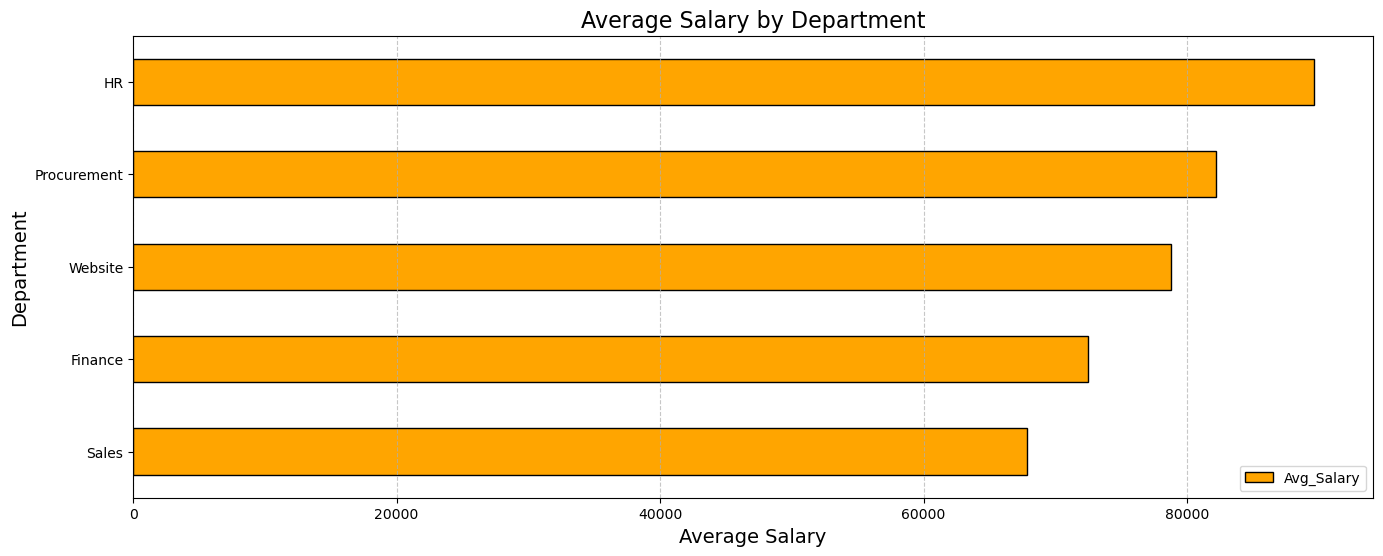

In [59]:
dep_avg_salary.plot(kind='barh', x='Department', y='Avg_Salary', color='orange', edgecolor='black', figsize=(16, 6))
plt.title('Average Salary by Department', fontsize=16)
plt.xlabel('Average Salary', fontsize=14)
plt.ylabel('Department', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

**Observation**
-Clearly we can see that the HR Department has highest Average Salary i.e. 89650 and Sales has lowest i.e.67866.43

**10. What is the average salary for male, female and others employees?
Is there a noticeable salary gap between genders?**

In [60]:
gender_avg_sal=data.groupby('Gender')['Salary'].mean().reset_index(name="Avg_Salary").sort_values(by='Avg_Salary')
gender_avg_sal

,Gender,Avg_Salary
1,Male,74092.555556
0,Female,79965.764706
2,Other,86025.000000


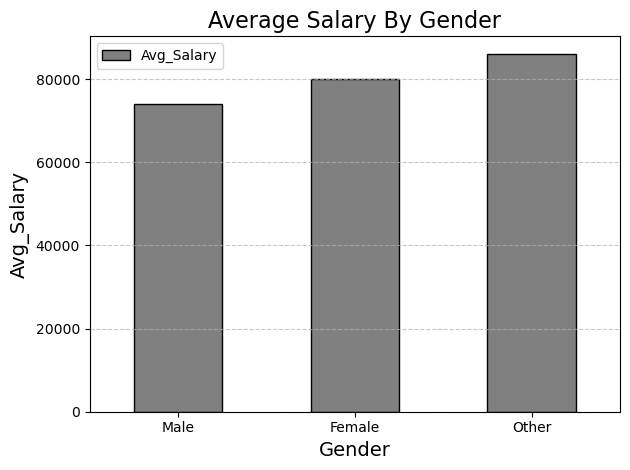

In [61]:
gender_avg_sal.plot(kind='bar',x='Gender',y='Avg_Salary',color='grey',edgecolor='black')
plt.title('Average Salary By Gender',fontsize=16)
plt.xticks(rotation=0)
plt.xlabel("Gender",fontsize=14)
plt.ylabel("Avg_Salary",fontsize=14)
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.tight_layout()
plt.show()

**Observation**
- we can clearly observe that Other has highest average salary followed by Female then male has least average salary

**11. What is the average salary in each country?**

In [62]:
coun_avg_salary=data.groupby('Country')['Salary'].mean().reset_index(name='Avg_Salary').sort_values(by='Avg_Salary')
coun_avg_salary

,Country,Avg_Salary
1,NZ,77049.555556
0,IND,77440.769231


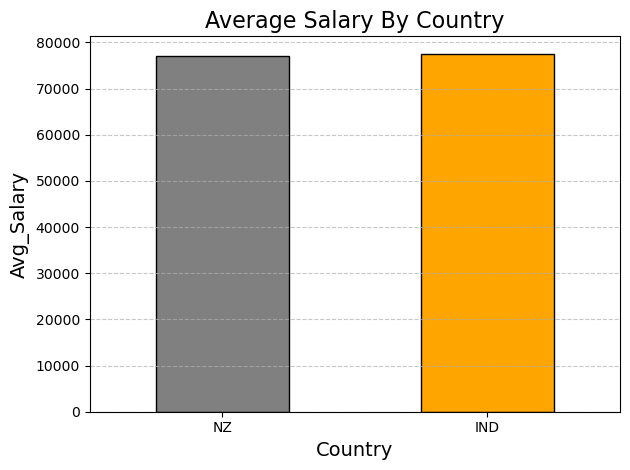

In [63]:
coun_avg_salary.plot(kind='bar',x='Country',y='Avg_Salary',color=['grey','orange'],edgecolor='black',legend=False)
plt.title('Average Salary By Country',fontsize=16)
plt.xticks(rotation=0)
plt.xlabel("Country",fontsize=14)
plt.ylabel("Avg_Salary",fontsize=14)
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.tight_layout()
plt.show()

- Comparatively India has slightly better Average Salary than NZ

**12.How many employees joined each year?**

In [64]:
data['Joining_Year']=pd.to_datetime(data['Date Joined']).dt.year

In [65]:
data

,Gender,Age,Rating,Date Joined,Department,Salary,Country,Salary_Range,Joining_Year
0,Male,20,Average,2020-10-18,Website,112650,IND,$100K+,2020
1,Male,32,Above average,2021-04-07,Website,43840,IND,$40K–$60K,2021
2,Female,31,Average,2022-04-12,Procurement,103550,IND,$100K+,2022
3,Male,32,Average,2021-05-23,HR,45510,IND,$40K–$60K,2021
4,Female,37,Poor,2020-09-11,Finance,115440,IND,$100K+,2020
...,...,...,...,...,...,...,...,...,...
178,Female,33,Average,2021-04-26,Website,75280,NZ,$60K–$80K,2021
179,Male,33,Average,2021-07-08,Sales,74550,NZ,$60K–$80K,2021
180,Male,30,Average,2022-05-20,Procurement,67950,NZ,$60K–$80K,2022
181,Male,42,Poor,2022-06-19,Finance,70270,NZ,$60K–$80K,2022


In [66]:
join_year=data.groupby('Joining_Year').size().reset_index(name='Emp_Count')
join_year

,Joining_Year,Emp_Count
0,2020,37
1,2021,82
2,2022,60
3,2023,2


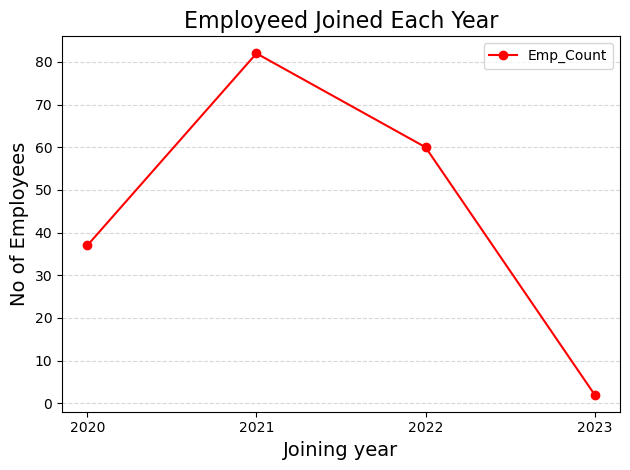

In [67]:
join_year.plot(kind='line',x='Joining_Year',y='Emp_Count',marker='o',color='red')
plt.title("Employeed Joined Each Year",fontsize=16)
plt.xlabel("Joining year",fontsize=14)
plt.ylabel("No of Employees",fontsize=14)
plt.xticks([2020,2021,2022,2023])
plt.grid(axis='y',linestyle='--',alpha=0.5)
plt.tight_layout()
plt.show()

- we can clearly observe that most employees joined this company in 2021 followed by 2022,2020 and least in 2023

In [68]:
data['Join_Month']=pd.to_datetime(data['Date Joined']).dt.month

In [69]:
data

,Gender,Age,Rating,Date Joined,Department,Salary,Country,Salary_Range,Joining_Year,Join_Month
0,Male,20,Average,2020-10-18,Website,112650,IND,$100K+,2020,10
1,Male,32,Above average,2021-04-07,Website,43840,IND,$40K–$60K,2021,4
2,Female,31,Average,2022-04-12,Procurement,103550,IND,$100K+,2022,4
3,Male,32,Average,2021-05-23,HR,45510,IND,$40K–$60K,2021,5
4,Female,37,Poor,2020-09-11,Finance,115440,IND,$100K+,2020,9
...,...,...,...,...,...,...,...,...,...,...
178,Female,33,Average,2021-04-26,Website,75280,NZ,$60K–$80K,2021,4
179,Male,33,Average,2021-07-08,Sales,74550,NZ,$60K–$80K,2021,7
180,Male,30,Average,2022-05-20,Procurement,67950,NZ,$60K–$80K,2022,5
181,Male,42,Poor,2022-06-19,Finance,70270,NZ,$60K–$80K,2022,6


In [70]:
join_month=data.groupby('Join_Month').size().reset_index(name='Emp_Count')
join_month

,Join_Month,Emp_Count
0,1,9
1,2,15
2,3,18
3,4,15
4,5,21
5,6,14
6,7,22
7,8,12
8,9,19
9,10,12


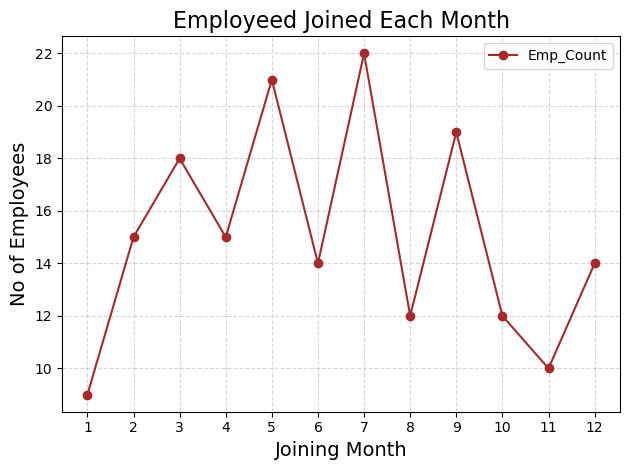

In [71]:
join_month.plot(kind='line',x='Join_Month',y='Emp_Count',marker='o',color='brown')
plt.title("Employeed Joined Each Month",fontsize=16)
plt.xlabel("Joining Month",fontsize=14)
plt.ylabel("No of Employees",fontsize=14)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.grid(axis='x',linestyle='--',alpha=0.5)
plt.grid(axis='y',linestyle='--',alpha=0.5)
plt.tight_layout()
plt.show()

- In Month of July Most Number of Employees has joined the company

**13.What is the average tenure of employees (difference between today and "Date Joined")?**

In [72]:
Today=pd.Timestamp.today()

In [73]:
Today

Timestamp('2025-01-01 17:14:33.180015')

In [74]:
data['Tenure_Days'] = (Today - data['Date Joined']).dt.days
data['Tenure_Years'] = (data['Tenure_Days'] / 365).round(2)  # Convert days to years

In [75]:
data

,Gender,Age,Rating,Date Joined,Department,Salary,Country,Salary_Range,Joining_Year,Join_Month,Tenure_Days,Tenure_Years
0,Male,20,Average,2020-10-18,Website,112650,IND,$100K+,2020,10,1536,4.21
1,Male,32,Above average,2021-04-07,Website,43840,IND,$40K–$60K,2021,4,1365,3.74
2,Female,31,Average,2022-04-12,Procurement,103550,IND,$100K+,2022,4,995,2.73
3,Male,32,Average,2021-05-23,HR,45510,IND,$40K–$60K,2021,5,1319,3.61
4,Female,37,Poor,2020-09-11,Finance,115440,IND,$100K+,2020,9,1573,4.31
...,...,...,...,...,...,...,...,...,...,...,...,...
178,Female,33,Average,2021-04-26,Website,75280,NZ,$60K–$80K,2021,4,1346,3.69
179,Male,33,Average,2021-07-08,Sales,74550,NZ,$60K–$80K,2021,7,1273,3.49
180,Male,30,Average,2022-05-20,Procurement,67950,NZ,$60K–$80K,2022,5,957,2.62
181,Male,42,Poor,2022-06-19,Finance,70270,NZ,$60K–$80K,2022,6,927,2.54


In [76]:
# average Tenure Years
data['Tenure_Years'].mean()

3.3652486187845287

In [77]:
# average Tenure days
data['Tenure_Days'].mean()

1228.220994475138

In [78]:
#average tenure by department
Avg_Exp=data.groupby('Department')['Tenure_Years'].mean().reset_index(name='Avg_Exp_Yrs')
Avg_Exp

,Department,Avg_Exp_Yrs
0,Finance,3.492368
1,HR,3.796250
2,Procurement,3.125472
3,Sales,3.398929
4,Website,3.429815


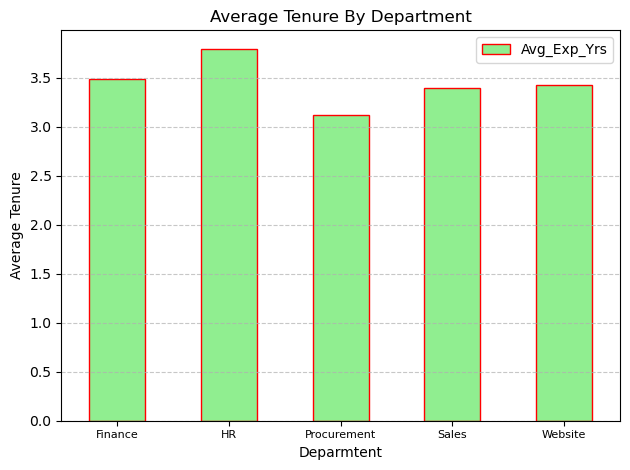

In [79]:
Avg_Exp.plot(kind='bar',x='Department',y='Avg_Exp_Yrs',color='lightgreen',edgecolor='red')
plt.title("Average Tenure By Department")
plt.xticks(rotation=0,fontsize=8)
plt.xlabel("Deparmtent")
plt.ylabel("Average Tenure")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Observation:**
- HR Department has most average experience.
- Procurement has least experience.

**14.What is the relationship between age and salary? Do older employees earn more?**

In [80]:
data['Age'].corr(data['Salary'])

0.0801901447457483

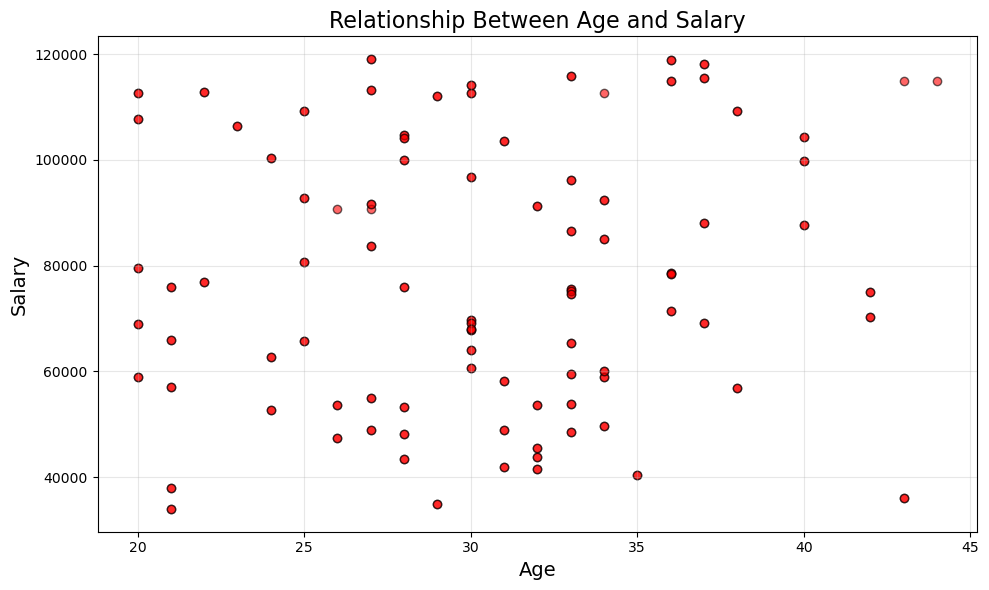

In [81]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], data['Salary'], alpha=0.6, color='red', edgecolor='black')
plt.title('Relationship Between Age and Salary', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Salary', fontsize=14)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

**Observation:**
- A very weak positive relationship between age and salary. This suggests that, while there might be a slight tendency for older employees to earn more, the relationship is almost negligible.
- Age might not significantly influence salary in your organization.
- Other factors (e.g.department, performance, gender, country, Expereience) may play a more significant role in determining salary.

**14. Is Salary Depends on Rating or Department?**

In [82]:
from sklearn.preprocessing import LabelEncoder

In [83]:
data['Rating_Enc']=data['Rating'].map({'Very poor': 1,'Poor': 2,'Average':3,'Above average':4,'Exceptional':5})
data.head(2)

,Gender,Age,Rating,Date Joined,Department,Salary,Country,Salary_Range,Joining_Year,Join_Month,Tenure_Days,Tenure_Years,Rating_Enc
0,Male,20,Average,2020-10-18,Website,112650,IND,$100K+,2020,10,1536,4.21,3
1,Male,32,Above average,2021-04-07,Website,43840,IND,$40K–$60K,2021,4,1365,3.74,4


In [84]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Department_le']=le.fit_transform(data['Department'])
data.head(2)

,Gender,Age,Rating,Date Joined,Department,Salary,Country,Salary_Range,Joining_Year,Join_Month,Tenure_Days,Tenure_Years,Rating_Enc,Department_le
0,Male,20,Average,2020-10-18,Website,112650,IND,$100K+,2020,10,1536,4.21,3,4
1,Male,32,Above average,2021-04-07,Website,43840,IND,$40K–$60K,2021,4,1365,3.74,4,4


In [85]:
#correlation b/w Rating and Salary
data['Rating_Enc'].corr(data['Salary'])

0.026152238135908855

In [86]:
#correlation between Department And Salary
data['Department_le'].corr(data['Salary'])

0.02477820022414409

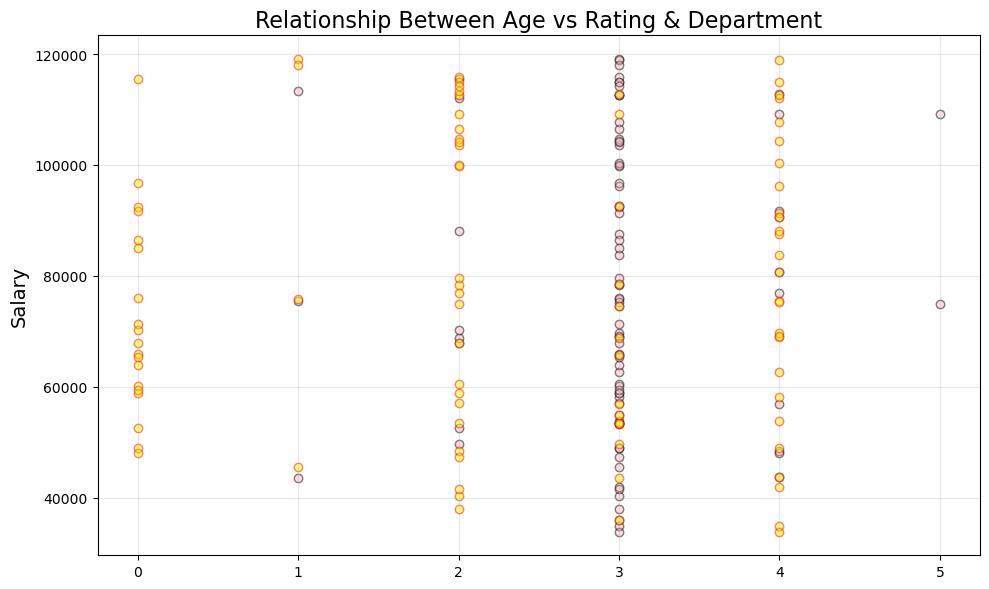

In [87]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Rating_Enc'], data['Salary'], alpha=0.3, color='pink', edgecolor='black')
plt.scatter(data['Department_le'], data['Salary'], alpha=0.3, color='yellow', edgecolor='red')
plt.title('Relationship Between Age vs Rating & Department', fontsize=16)
plt.ylabel('Salary', fontsize=14)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

**Observations:**
- Here also, no much correlation has been observed neither by Department nor by Rating or Performance
- Then we have to check either it is dependent on Experience or not

**15. Is salary depends upon experience of employee?**

In [88]:
#sal_cor=data['Tenure_Days'].corr(data['Salary'])
sal_cor=data[['Tenure_Days','Salary']].corr()

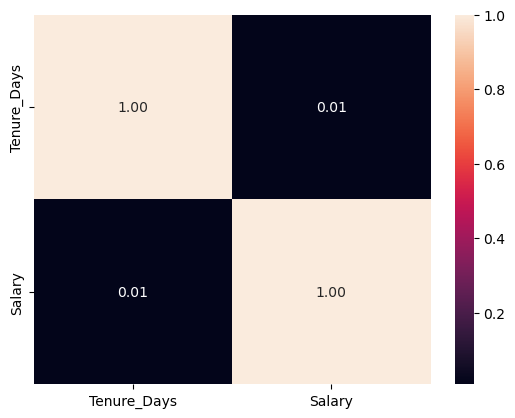

In [89]:
sns.heatmap(sal_cor,annot=True,fmt='0.2f')
plt.show()

In [90]:
data[data['Salary']>100000]

,Gender,Age,Rating,Date Joined,Department,Salary,Country,Salary_Range,Joining_Year,Join_Month,Tenure_Days,Tenure_Years,Rating_Enc,Department_le
0,Male,20,Average,2020-10-18,Website,112650,IND,$100K+,2020,10,1536,4.21,3,4
2,Female,31,Average,2022-04-12,Procurement,103550,IND,$100K+,2022,4,995,2.73,3,2
4,Female,37,Poor,2020-09-11,Finance,115440,IND,$100K+,2020,9,1573,4.31,2,0
9,Male,25,Above average,2022-04-14,Procurement,109190,IND,$100K+,2022,4,993,2.72,4,2
10,Male,40,Average,2021-05-04,Website,104410,IND,$100K+,2021,5,1338,3.67,3,4
14,Female,34,Average,2022-03-22,Procurement,112650,IND,$100K+,2022,3,1016,2.78,3,2
16,Male,36,Average,2020-05-07,Website,118840,IND,$100K+,2020,5,1700,4.66,3,4
25,Male,24,Average,2022-03-05,Website,100420,IND,$100K+,2022,3,1033,2.83,3,4
27,Female,44,Average,2023-02-28,Website,114870,IND,$100K+,2023,2,673,1.84,3,4
29,Female,30,Average,2022-08-27,Procurement,112570,IND,$100K+,2022,8,858,2.35,3,2


**Observation**
- Here also no much correlation between Salary and Experience.

**16. Which department is most common in each country?**

In [91]:
cnt_dep=data.groupby('Country')['Department'].value_counts().unstack()
cnt_dep

Department,Finance,HR,Procurement,Sales,Website
Country,,,,,
IND,19,4,27,14,27
NZ,19,4,26,14,27


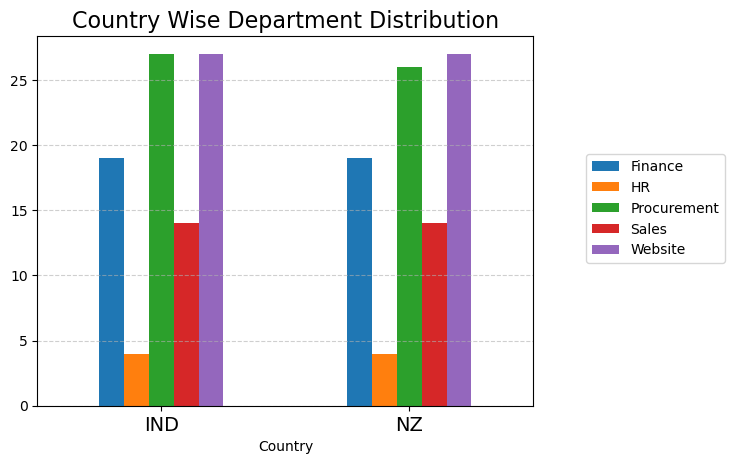

In [92]:
cnt_dep.plot(kind='bar',stacked=False)
plt.title("Country Wise Department Distribution",fontsize=16)
plt.xticks(rotation=0,fontsize=14)
plt.xlabel("Country",fontsize=10)
plt.legend(loc='upper right',bbox_to_anchor=(1.4,0.7))
plt.grid(axis="y",linestyle='--',alpha=0.6)
plt.show()

**Observation:**
- In India and NZ almost similar distribution of department occurs.

**17. Within each department, do males or females have higher average salaries?**

In [93]:
gend=data.groupby(['Department','Gender'])['Salary'].mean().unstack()
gend

Gender,Female,Male,Other
Department,,,
Finance,75365.263158,67411.250000,81146.666667
HR,103986.000000,65756.666667,NaN
Procurement,91253.913043,75287.000000,NaN
Sales,74443.636364,63610.588235,NaN
Website,71388.888889,85520.416667,90903.333333


In [94]:
gend=gend.drop(columns="Other")
gend

Gender,Female,Male
Department,,
Finance,75365.263158,67411.250000
HR,103986.000000,65756.666667
Procurement,91253.913043,75287.000000
Sales,74443.636364,63610.588235
Website,71388.888889,85520.416667


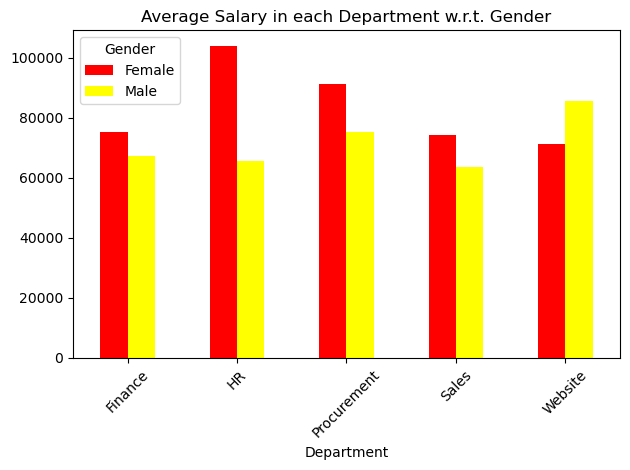

In [95]:
gend.plot(kind="bar",stacked=False,color=['red','yellow'])
plt.xticks(rotation=45)
plt.title("Average Salary in each Department w.r.t. Gender")
plt.tight_layout()
plt.show()

**Observation**
- In HR Department, Average Salary of Female is Highest.
- Website is the only Department where average Salary of Male is higher than Female.
- Except Website, In each Department Female have higher average salary than male.